In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Получение данных

In [18]:
import yfinance as yf
raw_data = yf.download('AMZN', '2015-01-01', '2020-01-01')['Adj Close']
raw_data.head()

[*********************100%***********************]  1 of 1 completed


Date
2014-12-31    310.350006
2015-01-02    308.519989
2015-01-05    302.190002
2015-01-06    295.290009
2015-01-07    298.420013
Name: Adj Close, dtype: float64

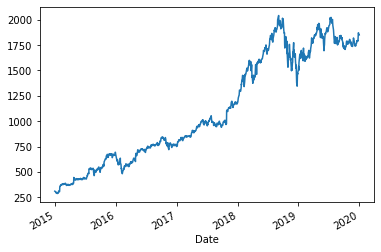

In [19]:
raw_data.plot()
plt.show()

row - временной ряд <br>
t∈[0;1] - параметр, который отделяет обучающую часть от прогнозируемой

In [20]:
def sample_model(row, t):
    T = round(row.count() * t)
    sample_row = row[:T].copy()
    old_row = row[T:].copy()
    new_row = row[T:].copy()
    
    a = sample_row[-1]
    b = (a - sample_row[0])/sample_row.count()
    for i in range(new_row.count()):
        new_row[i] = a+b*i
    
    
    sample_row.plot()
    old_row.plot()
    new_row.plot()
    plt.show()
    return old_row, new_row

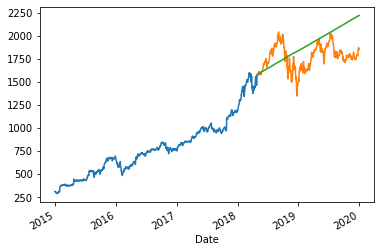

In [21]:
sample_old, sample_new = sample_model(raw_data, (2/3))

## Выборочный коэффициент корреляции

old - оригинальный временной ряд <br>
new - спрогнозированный временной ряд

In [22]:
def sample_correlation_coefficient(old, new):
    n = old.count()
    old_m = old.mean()
    new_m = new.mean()
    cov = 1/(n-1) * sum([(old[i]-old_m)*(new[i]-new_m) for i in range(n)])
    var_old = 1/(n-1) * sum([(old[i]-old_m)**2 for i in range(n)])
    var_new = 1/(n-1) * sum([(new[i]-new_m)**2 for i in range(n)])
    r = cov/(var_old**0.5 * var_new**0.5)
    return r

In [23]:
sample_correlation_coefficient(sample_old, sample_new)

0.22983433484091853